# Neural Networks with Tensor flow

- NN provides classification or predictions
- takes i/p and maps it to some o/p (like a function)
- NN made of layers
- Input layer(raw data), output layer(can have any no of nodes-prob distribution)
- Hidden layer(can have any n of layers of this type)-we don't observe these layers
- every single layer is connected to other layer with weights
- densely connected NN (connected to every node from previous layers)
- weights of these connections are called trainable parameters which can be changed to get the best possible result
- bias (it exits in prev layer to the layer that it reflect)
- bias is a node, but it does not take any i/p and it is another trainable parameter
- it is some const numeric val that is connected to every node of hidden layer, these weights always have a val of 1
- determine the values of hidden nodes - weighted sum of prev nodes that it is conneced to and it is added to the bias weight
- Activation Function- it is a simple function applied on weighted sum of neuron. adds more complexity to the model- they are higher deg/ordered functions that tends to add higher dimension to the data(and hence we can spread the data points and gives complex predictions)
- examples of activation function

Relu(Rectified Linear Unit) - takes any x-values<0 and makes 0 and any values that are + it is equal t its value.

Tanh(Hyberbolic Tangent) - compresses our val b/w -1 and +1.

Sigmoid - compresses our value b/w 0 and 1.

- we aply this activation function on the sum weighted before we send it to next node
- Loss function: cal how far away is the o/p from the expected o/p and tells to change the weights and bias accordingly
- examples of loass function: Mean Suare Error, Mean Absolute Error, Hinge Loss

### Gradient Descent and back propagation
- how we actually update the weights and bias
- it finds out in wt direction(gradient-steepness) does the function move to obtain the global minima .i.e, the least loss possible
- Back propagation algo will go backwards to the network and update sthe weights and bias 

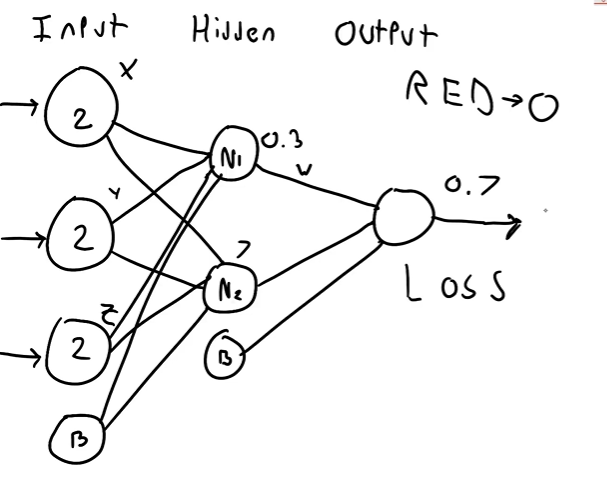

## Optimizer
- an optimization function implements the backpropagation
- some of the optimizers are

Gradient Descent.

Stochastic Gradient Descent.

Mini-Batch GD.

Momentum.

Nesterov Accelerated Gradient.


## Creating a Neural Network

In [10]:
# imports

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Dataset
we use MNIST fashion dataset which is included in keras and it includes 60,000 images for training and 10,000 images for testing

In [11]:
# Dataset

fashion_mnist = keras.datasets.fashion_mnist # load dataset

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data() # splits into training and testing

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
train_images[0,23,23] # reference one pixel

194

In [14]:
train_labels[:10] # 1st 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [15]:
# labels range from 0-9.. each int repr specific article of clothing
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Cost', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

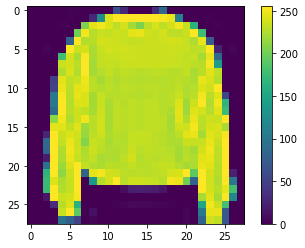

In [16]:
# see how images look like
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

### Data preprocessing
- aply some prior transformations to the data before feeding the data into the model.
- Here we scall all the graypixel values(0-255) to be b/w 0-1. This can be done by divding each value in traning sets by 255

In [17]:
train_images = train_images/255.0
test_images = test_images/255.0

### Building the model

- here to build our model we use keras sequential model with 3 diff layers
- this model repr the feed-forward NN(passes values from left to right)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer
    keras.layers.Dense(128, activation='relu'), # hidden layer
    keras.layers.Dense(10, activation='softmax') # output layer
])

### Compile the model
- last step in biulding the model is to define loss function, optimizer and metrics


In [23]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Training the model

In [24]:
model.fit(train_images, train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4978 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3721 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3336 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3102 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2920 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2775 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2651 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2440 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.236

### Evaluating the model
- here we test and evaluate the model

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.8858
Test accuracy: 0.8858000040054321


### Making Predections
- here we pass an array of data in the form we specified in the input layer to .predict() method

In [33]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
# predictions[0] it is the prob distn cal on the o/p layer for that image
# argmax - shows the class with high value
# class_names - we print the class name of that higher value

313/313 [==============================] - 0s 1ms/step
Ankle Boot


Trouser


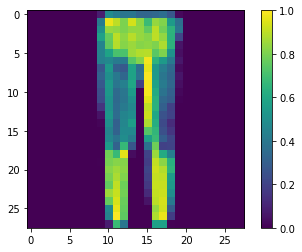

In [36]:
# here we print the image
print(class_names[np.argmax(predictions[3])])
plt.figure()
plt.imshow(test_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

### small function to help us to verify with some visuals

Pick a number: 34
1/1 [==============================] - 0s 22ms/step


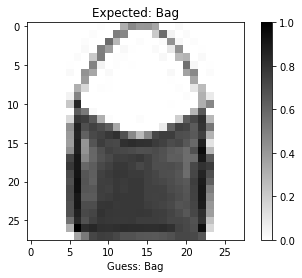

In [40]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, imge, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Cost', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    show_image(image, class_names[correct_label], predicted_class)
    
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: "+label)
    plt.xlabel("Guess: "+guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input("Pick a number: ")
        if(num.isdigit()):
            num = int(num)
            if 0<=num<=1000:
                return int(num)
        else:
            print('Try Again!!')

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model,image,label)
            